In [100]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [101]:
objects = tf.keras.datasets.mnist
(train_images, train_labels) , (test_images, test_labels) = objects.load_data()

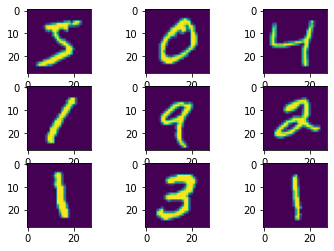

In [102]:
for i in range(9):
  # defining sublot
  plt.subplot(330 + 1 + i)
  # plot raw pixel data
  plt.imshow(train_images[i])


In [103]:
print(train_images.shape)
print(train_images[0])

(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 25

In [104]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [105]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [109]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics =['accuracy'])

In [107]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2621 - accuracy: 0.9253
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1160 - accuracy: 0.9652
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0800 - accuracy: 0.9757
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0612 - accuracy: 0.9813
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0470 - accuracy: 0.9854


In [110]:
print(model.evaluate(test_images, test_labels))

313/313 [==============================] - 1s 1ms/step - loss: 0.0756 - accuracy: 0.9781
[0.0755903571844101, 0.9781000018119812]


7


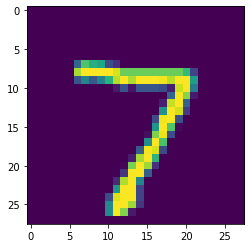

In [111]:
plt.imshow(test_images[0])
prediction=model.predict(test_images)
print(np.argmax(prediction[0]))

In [112]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

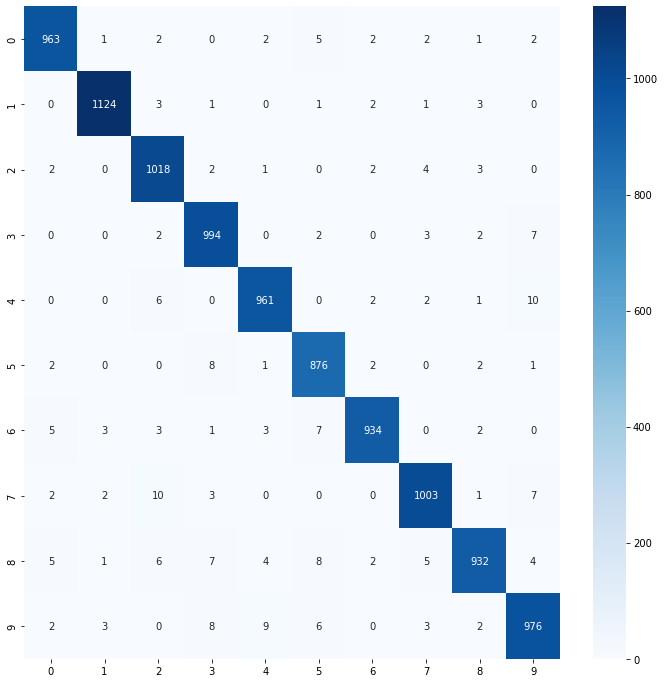

In [113]:
nn_array = confusion_matrix(test_labels, np.argmax(model.predict(test_images), axis = 1) )
plt.figure(figsize=(12,12))
sns.heatmap(nn_array, cmap='Blues',fmt="g",annot=True)
plt.show()

Distinguish 4 from 9 - when x-axis = 4, image is recongized 4 as 964 times and as 9 17 times
Distinguish 6 from 9 - when x-axis = 6, image is recognized as 6, 945 times and as 9 0 times

In [114]:
#info for (4,6 and 9) labels and predictions
labelled_4 = np.where(train_labels == 4)
predicted_4 = np.where(np.argmax(model.predict(test_images),axis=1) == 4 )

labelled_6 = np.where(train_labels == 6)
predicted_6 = np.where(np.argmax(model.predict(test_images),axis=1) == 6 )

labelled_9 = np.where(train_labels == 9)
predicted_9 = np.where(np.argmax(model.predict(test_images),axis=1) == 9 )


In [115]:
# 4 predicted as 9
missed_index = []
for pred9 in predicted_9[0]:
  if pred9 in labelled_4[0]:
    missed_index.append(pred9)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


ValueError: ignored

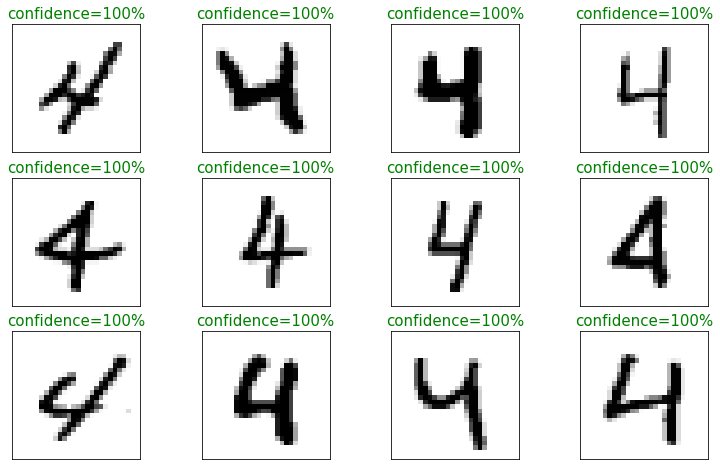

In [117]:
# plots of 4 predicted as 9

fig =plt.figure(figsize=(13, 8))
for i in range(len(missed_index)):
    img = train_images[missed_index[i]]
    preds = model.predict(img.reshape(-1,28,28)) 
    lbl = train_labels[missed_index[i]]
    pred = preds.argmax()
    plt.subplot(3,4, i+1)
    plt.subplot(3,4, i+1).set_title(f"confidence={round(preds.max()*100)}%" ,   c='g' , fontsize=15)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
plt.suptitle("Sample Images  Labelled Four Predicted as 9" , c='r' , fontsize=20)
plt.show()







In [87]:
# 9 predicted as 4
missed_index2 = []
for pred4 in predicted_4[0]:
  if pred4 in labelled_9[0]:
    missed_index2.append(pred4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


ValueError: ignored

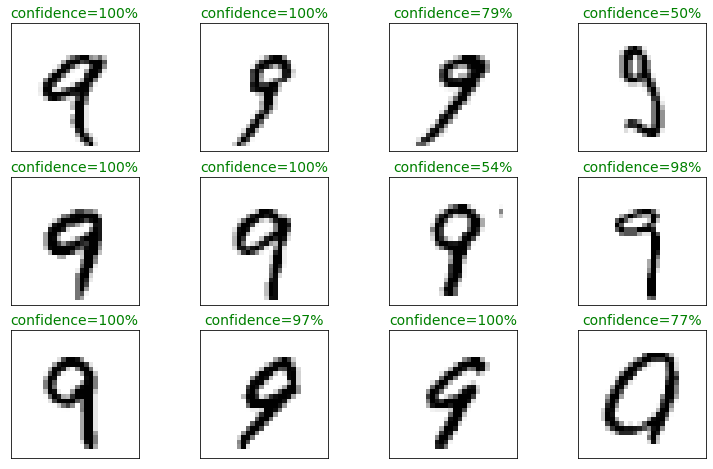

In [88]:
# plots of 9 predicted as 4

fig=plt.figure(figsize=(13, 8))
for i in range(len(missed_index2)):
  img = train_images[missed_index2[i]]
  preds = model.predict(img.reshape(-1,28,28))
  lbl = train_labels[missed_index2[i]]
  pred = preds.argmax()
  plt.subplot(3,4, i+1)
  plt.subplot(3,4, i+1).set_title(f"confidence={round(preds.max()*100)}%" , c='g' , fontsize=14)
  plt.grid('False')
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
plt.suptitle("Sample images labelled as 9 predicted as 4", c='r', fontsize=14)
plt.show()

In [89]:
# 6 predicted as 9
missed_index3 = []
for pred9 in predicted_9[0]:
  if pred9 in labelled_6[0]:
    missed_index3.append(pred9)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


ValueError: ignored

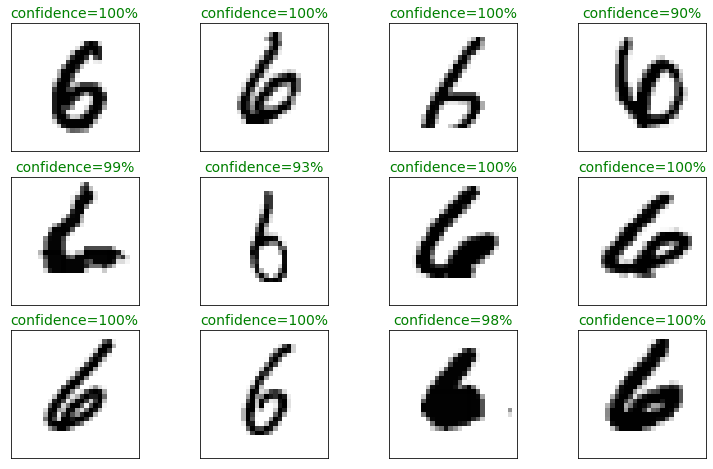

In [91]:
fig=plt.figure(figsize=(13, 8))
for i in range(len(missed_index3)):
  img = train_images[missed_index3[i]]
  preds = model.predict(img.reshape(-1,28,28))
  lbl = train_labels[missed_index3[i]]
  pred = preds.argmax()
  plt.subplot(3,4, i+1)
  plt.subplot(3,4, i+1).set_title(f"confidence={round(preds.max()*100)}%" , c='g' , fontsize=14)
  plt.grid('False')
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
plt.suptitle("Sample images labelled as 6 predicted as 9", c='r', fontsize=14)
plt.show()

In [92]:
# 9 predicted as 6
missed_index4 = []
for pred6 in predicted_6[0]:
  if pred6 in labelled_9[0]:
    missed_index4.append(pred6)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


ValueError: ignored

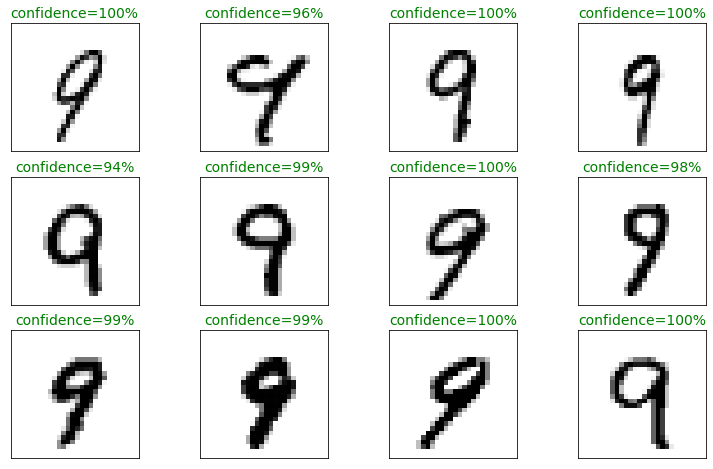

In [94]:
fig=plt.figure(figsize=(13, 8))
for i in range(len(missed_index4)):
  img = train_images[missed_index4[i]]
  preds = model.predict(img.reshape(-1,28,28))
  lbl = train_labels[missed_index4[i]]
  pred = preds.argmax()
  plt.subplot(3,4, i+1)
  plt.subplot(3,4, i+1).set_title(f"confidence={round(preds.max()*100)}%" , c='g' , fontsize=14)
  plt.grid('False')
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
plt.suptitle("Sample images labelled as 9 predicted as 6", c='r', fontsize=14)
plt.show()